# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [1]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
# Create a new dataframe from your CSV
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [2]:
# Print out any information you need to understand your dataframe
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
print(df.shape)

(23486, 11)


In [4]:
print(df.dtypes)

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object


In [23]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,num_missing
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.0
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936,0.0
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202,0.0
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000,0.0
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000,0.0
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000,0.0
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000,0.0
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000,0.0


Now you have a dataframe set up, you are ready to dive in and start cleaning!

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

<Axes: >

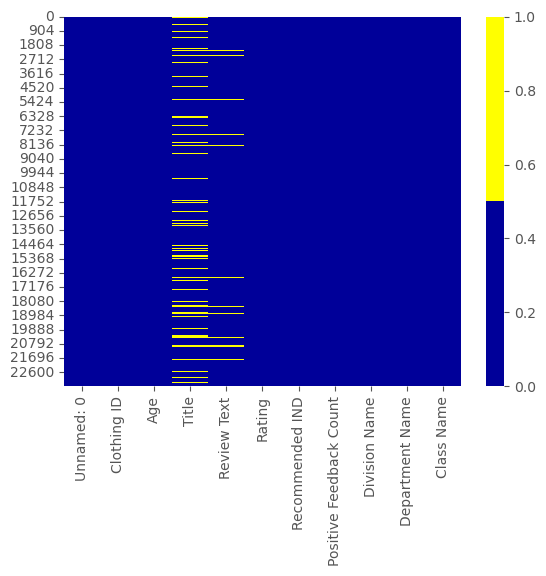

In [5]:
# Plot a heatmap of any missing data
cols = df.columns[:30]
colors = ['#000099', '#ffff00']
sns.heatmap(df[cols].isnull(), cmap = sns.color_palette(colors))

In [6]:
# Try out a missing data percentage list! 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Clothing ID - 0%
Age - 0%
Title - 16%
Review Text - 4%
Rating - 0%
Recommended IND - 0%
Positive Feedback Count - 0%
Division Name - 0%
Department Name - 0%
Class Name - 0%


created missing idicator for: Title
created missing idicator for: Review Text
created missing idicator for: Division Name
created missing idicator for: Department Name
created missing idicator for: Class Name


<Axes: xlabel='index'>

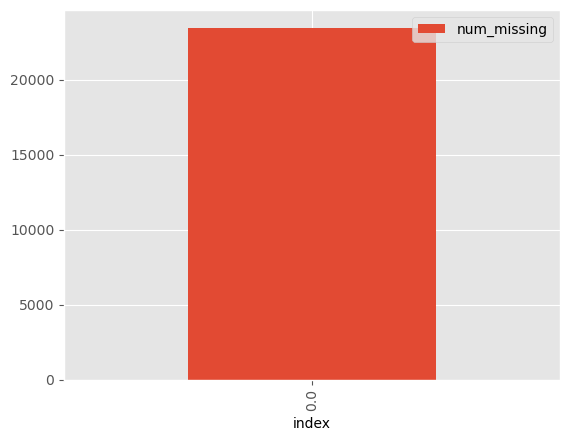

In [7]:
# Plot a missing data histogram
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing >0:
        print('created missing idicator for: {}'.format(col))
        df['{}_is missing'.format(col)] = missing
        
        
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis = 1)

df['num_missing'].value_counts().reset_index().sort_values(by = 'index').plot.bar(x ='index', y = 'num_missing')

Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

In [8]:
# Handle any missing data in your dataframe.
df['Title'] = df['Title'].fillna("MISSING")
df['Review Text'] = df['Review Text'].fillna("MISSING")

In [9]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Clothing ID - 0%
Age - 0%
Title - 0%
Review Text - 0%
Rating - 0%
Recommended IND - 0%
Positive Feedback Count - 0%
Division Name - 0%
Department Name - 0%
Class Name - 0%
Title_is missing - 0%
Review Text_is missing - 0%
Division Name_is missing - 0%
Department Name_is missing - 0%
Class Name_is missing - 0%
num_missing - 0%


## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

<Axes: >

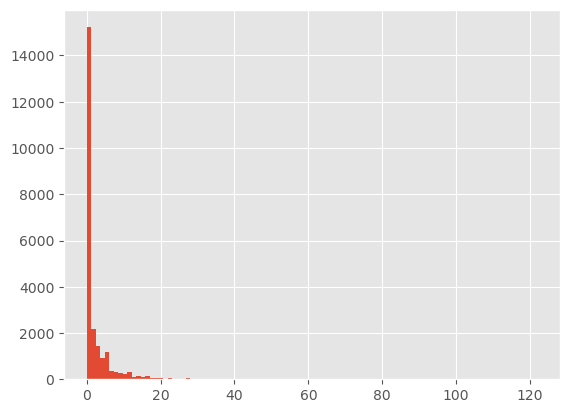

In [10]:
# Plot a histogram to see if there are any outliers.
df['Positive Feedback Count'].hist(bins=100)

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Clothing ID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Rating'}>,
        <Axes: title={'center': 'Recommended IND'}>,
        <Axes: title={'center': 'Positive Feedback Count'}>],
       [<Axes: title={'center': 'num_missing'}>, <Axes: >, <Axes: >]],
      dtype=object)

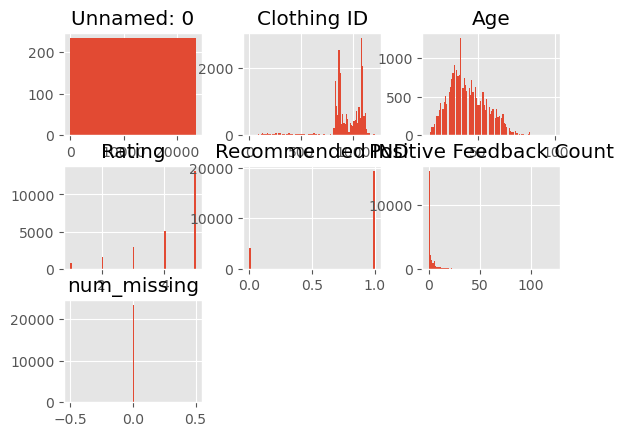

In [11]:
df.hist(bins=100)

<Axes: >

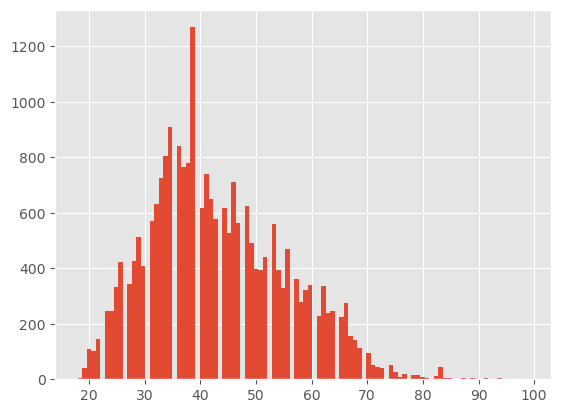

In [12]:
df['Age'].hist(bins=100)

<Axes: >

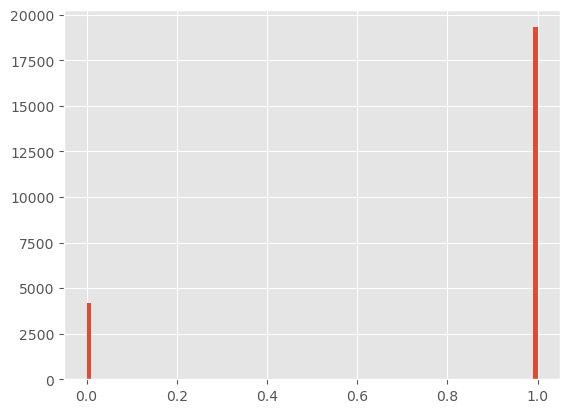

In [13]:
df['Recommended IND'].hist(bins=100)

In [14]:
# Use the describe() method
df['Positive Feedback Count'].describe()

count    23486.000000
mean         2.535936
std          5.702202
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        122.000000
Name: Positive Feedback Count, dtype: float64

<Axes: >

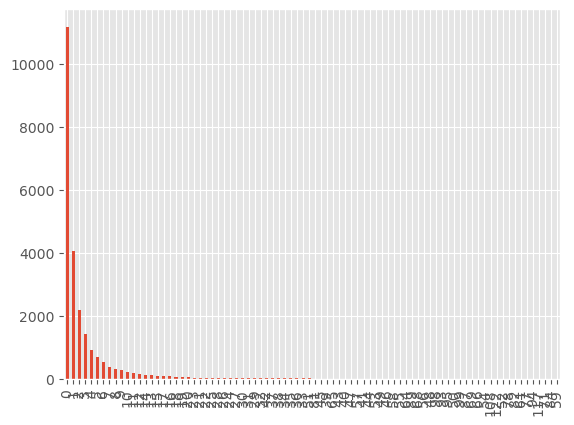

In [33]:
# Plot a bar chart

df['Positive Feedback Count'].value_counts().plot.bar(x = 'Clothin ID')

Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

In [26]:
# Handle any outliers in your dataframe
result = df[df['Positive Feedback Count'] >100]
result

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title_is missing,Review Text_is missing,Division Name_is missing,Department Name_is missing,Class Name_is missing,num_missing
1294,1294,1095,29,MISSING,I've been on the hunt for the perfect dress to...,5,1,117,GENERAL,dresses,Dresses,True,False,False,False,False,0.0
7218,7218,1092,34,Beware if you're fuller in the chest,I loved the lace detailing all over this dress...,3,1,122,GENERAL,dresses,Dresses,False,False,False,False,False,0.0
7765,7765,986,43,Quality does not merit cost,"I generally don't write bad reviews, but there...",1,0,108,GENERAL,jackets,Jackets,False,False,False,False,False,0.0


<Axes: >

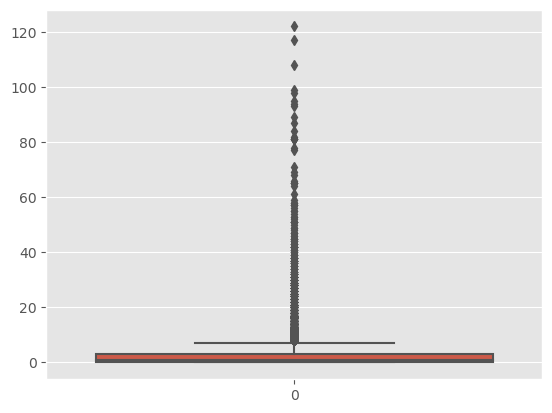

In [34]:
sns.boxplot(df['Positive Feedback Count'])

## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

In [18]:
# Look for any irrelevant data in the dataframe. How will you handle it?
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Review Text_is missing: 96.40211%
False    22641
True       845
Name: Review Text_is missing, dtype: int64

Division Name_is missing: 99.94039%
False    23472
True        14
Name: Division Name_is missing, dtype: int64

Department Name_is missing: 99.94039%
False    23472
True        14
Name: Department Name_is missing, dtype: int64

Class Name_is missing: 99.94039%
False    23472
True        14
Name: Class Name_is missing, dtype: int64

num_missing: 100.00000%
0.0    23486
Name: num_missing, dtype: int64



In [19]:
# Look for duplicates. How will you handle any duplicates?
df_dedupped = df.drop('Rating', axis=1).drop_duplicates()


print(df.shape)
print(df_dedupped.shape)

(23486, 17)
(23486, 16)


In [20]:
# Think about what data in the dataframe may be uninformative. Make note here of what situations may render data uninformative and how you would handle it?
#Data is uninformative if it doesn't give insight to a problem that may need to solved or a data question. In this dataset, the review text column may be 
#uninformative becuase it contains different string data in every row. This would be very difficult to analyse. I would probably delete this data from my analysis.

## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [21]:
# Try to convert all the strings in a column to lower or upper case. 
df["Division Name"] = df["Division Name"].str.upper()
df["Division Name"].value_counts(dropna = False)

GENERAL           13850
GENERAL PETITE     8120
INITMATES          1502
NaN                  14
Name: Division Name, dtype: int64

In [22]:
df["Department Name"] = df["Department Name"].str.lower()
df["Department Name"].value_counts(dropna = False)

tops        10468
dresses      6319
bottoms      3799
intimate     1735
jackets      1032
trend         119
NaN            14
Name: Department Name, dtype: int64